# 1. Introduction 
This assignment will help you to consolidate the concepts learnt in the  session. 


# 2. Problem Statement 
I decided to treat this as a classification problem by creating a new binary  variable affair (did the woman have at least one affair?) and trying to  predict the classification for each woman. 
Dataset 
The dataset I chose is the affairs dataset that comes with Statsmodels. It  was derived from a survey of women in 1974 by Redbook magazine, in  which married women were asked about their participation in extramarital  affairs. More information about the study is available in a 1978 paper from  the Journal of Political Economy. 
Description of Variables 
The dataset contains 6366 observations of 9 variables: 

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =  very good) 

age: woman's age 

yrs_married: number of years married 

children: number of children 

religious: woman's rating of how religious she is (1 = not religious, 4 =  strongly religious) 

educ: level of education (9 = grade school, 12 = high school, 14 =  some college, 16 = college graduate, 17 = some graduate school, 20  = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi skilled/unskilled, 3 = "white collar", 
4 =  teacher/nurse/writer/technician/skilled, 5 = managerial/business, 
6 =  professional with advanced degree) 

occupation_husb: husband's occupation (same coding as 

above) affairs: time spent in extra-marital affairs 


In [82]:
## Required libraries
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
sns.set()

In [2]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  
0              5.0  0.111111  
1              4.0  3.230769  
2              5.0  1.400000  
3              5.0  0.727273  
4              4.0  4.666666

In [3]:
#add "affair" column: 1 represents having affairs, 0  represents not 

dta['affairs'] = (dta.affairs >  0).astype(int) 

dta.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb  affairs  
0              5.0        1  
1              4.0        1  
2              5.0        1  
3              5.0        1  
4              4.0        1

In [4]:
dta.describe()

rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.322495  
std       2.178003     0.942399         1.346435     0.467468  
min       9.000000     1.000000         1.000000     0.000000  
25%      12.000000     3.000000         3.000000     0.000000  
50%      14.000000     3.000000         4.000000     0.000000  
75%      16.000000     4.000000         5.000000     1.000000  
max      20.000000     6.000000         6.000000     1.000000

In [5]:
dta.isnull().sum()


rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

## EDA

In [6]:
X1 = dta.drop('affairs',1)
y1 = dta['affairs']

In [7]:
X1.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb  
0              5.0  
1              4.0  
2              5.0  
3              5.0  
4              4.0

In [8]:
y1.shape

(6366,)

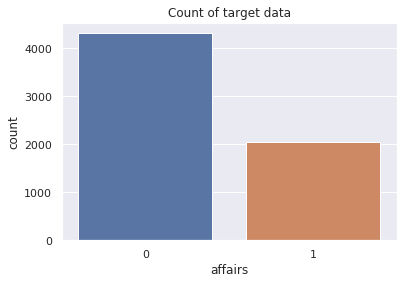

In [9]:
sns.countplot(y1)
plt.title("Count of target data")
plt.show()

In [10]:
cor = dta.corr()
cor

rate_marriage       age  yrs_married  children  religious  \
rate_marriage         1.000000 -0.111127    -0.128978 -0.129161   0.078794   
age                  -0.111127  1.000000     0.894082  0.673902   0.136598   
yrs_married          -0.128978  0.894082     1.000000  0.772806   0.132683   
children             -0.129161  0.673902     0.772806  1.000000   0.141845   
religious             0.078794  0.136598     0.132683  0.141845   1.000000   
educ                  0.079869  0.027960    -0.109058 -0.141918   0.032245   
occupation            0.039528  0.106127     0.041782 -0.015068   0.035746   
occupation_husb       0.027745  0.162567     0.128135  0.086660   0.004061   
affairs              -0.331776  0.146519     0.203109  0.159833  -0.129299   

                     educ  occupation  occupation_husb   affairs  
rate_marriage    0.079869    0.039528         0.027745 -0.331776  
age              0.027960    0.106127         0.162567  0.146519  
yrs_married     -0.109058    0.041782         0.128135  0.203109  
children        -0.141918   -0.015068         0.086660  0.159833  
religious        0.032245    0.035746         0.004061 -0.129299  
educ             1.000000    0.382286         0.183932 -0.075280  
occupation       0.382286    1.000000         0.201156  0.028981  
occupation_husb  0.183932    0.201156         1.000000  0.017637  
affairs         -0.075280    0.028981         0.017637  1.000000

Pearson Co-relation  of independent-features with target feature :-


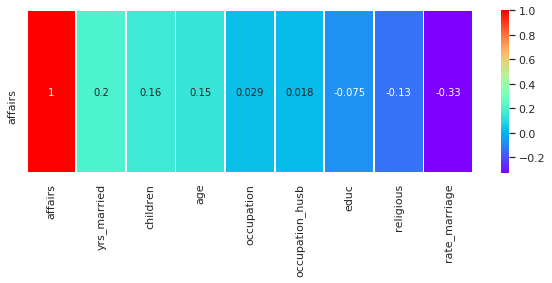

In [11]:
print('Pearson Co-relation  of independent-features with target feature :-')
plt.figure(figsize=(10,3))
cor=cor[['affairs']].sort_values(by='affairs',ascending=False)
sns.heatmap(cor.T,annot=True,linewidths=1,cmap='rainbow',cbar=True)
plt.show()

In [12]:
del dta['occupation_husb']

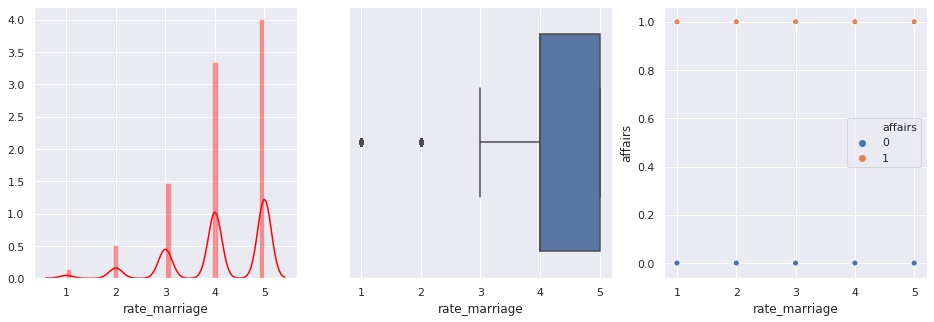

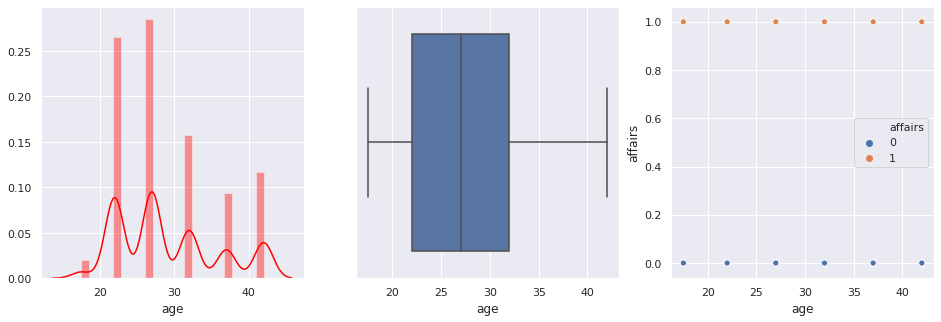

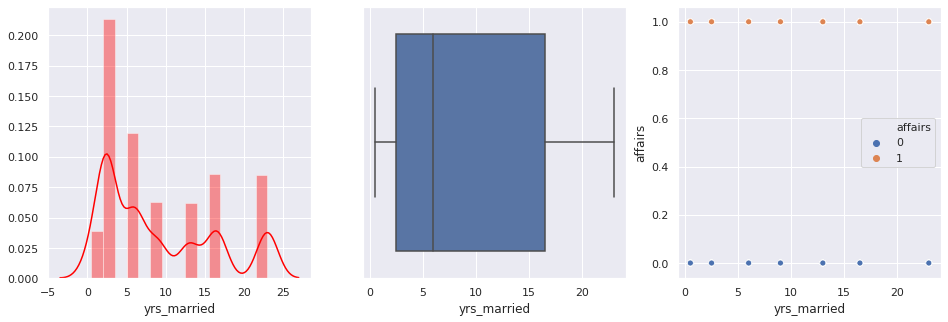

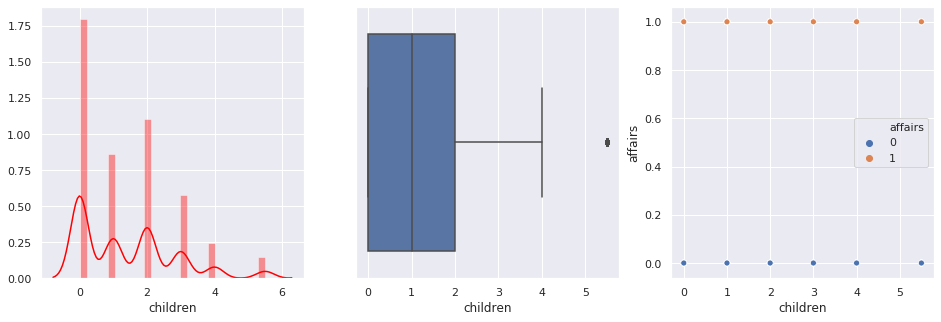

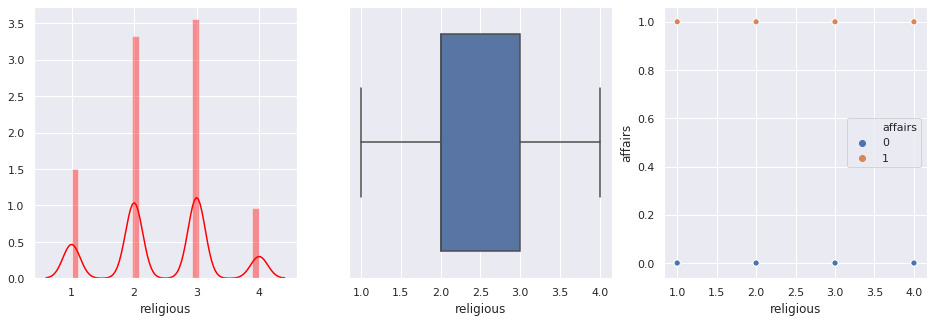

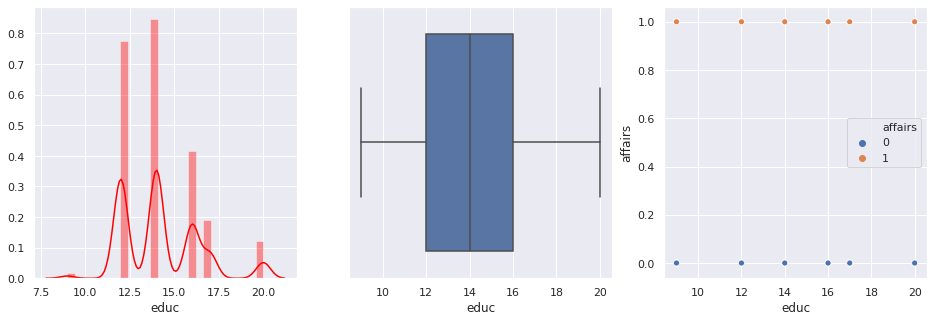

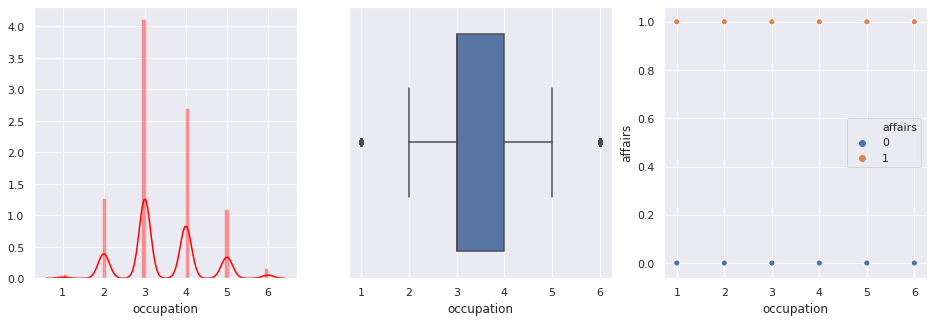

In [13]:
col = dta.columns
for i in range(len(col)-1) :
    plt.rcParams['font.size'] =13
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))
    a = dta[col[i]]
    b = dta[col]
    sns.distplot(a,color='red',ax=ax1)
    sns.boxplot(a,ax=ax2)
    sns.scatterplot(a,y1,hue=y1,ax=ax3)
    plt.show()

In [14]:
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation)',dta, return_type="dataframe")

In [15]:
X.head()

Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
0        1.0                   1.0                   0.0   
1        1.0                   0.0                   1.0   
2        1.0                   0.0                   1.0   
3        1.0                   0.0                   0.0   
4        1.0                   0.0                   1.0   

   C(occupation)[T.4.0]  C(occupation)[T.5.0]  C(occupation)[T.6.0]  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   0.0                   0.0   

   rate_marriage   age  yrs_married  children  religious  educ  
0            3.0  32.0          9.0       3.0        3.0  17.0  
1            3.0  27.0         13.0       3.0        1.0  14.0  
2            4.0  22.0          2.5       0.0        1.0  16.0  
3            4.0  37.0         16.5       4.0        3.0  16.0  
4            5.0  27.0          9.0       1.0        1.0  14.0

In [16]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'}) 

y = np.ravel(y) 

In [17]:
X.head()

Intercept  occ_2  occ_3  occ_4  occ_5  occ_6  rate_marriage   age  \
0        1.0    1.0    0.0    0.0    0.0    0.0            3.0  32.0   
1        1.0    0.0    1.0    0.0    0.0    0.0            3.0  27.0   
2        1.0    0.0    1.0    0.0    0.0    0.0            4.0  22.0   
3        1.0    0.0    0.0    0.0    1.0    0.0            4.0  37.0   
4        1.0    0.0    1.0    0.0    0.0    0.0            5.0  27.0   

   yrs_married  children  religious  educ  
0          9.0       3.0        3.0  17.0  
1         13.0       3.0        1.0  14.0  
2          2.5       0.0        1.0  16.0  
3         16.5       4.0        3.0  16.0  
4          9.0       1.0        1.0  14.0

In [18]:
del X['Intercept']

In [19]:
del X1

In [20]:
X.head()

occ_2  occ_3  occ_4  occ_5  occ_6  rate_marriage   age  yrs_married  \
0    1.0    0.0    0.0    0.0    0.0            3.0  32.0          9.0   
1    0.0    1.0    0.0    0.0    0.0            3.0  27.0         13.0   
2    0.0    1.0    0.0    0.0    0.0            4.0  22.0          2.5   
3    0.0    0.0    0.0    1.0    0.0            4.0  37.0         16.5   
4    0.0    1.0    0.0    0.0    0.0            5.0  27.0          9.0   

   children  religious  educ  
0       3.0        3.0  17.0  
1       3.0        1.0  14.0  
2       0.0        1.0  16.0  
3       4.0        3.0  16.0  
4       1.0        1.0  14.0

In [21]:
X.to_csv('Xdata.csv',index=None)

In [22]:
Xd = pd.read_csv('Xdata.csv')
Xd.head()

occ_2  occ_3  occ_4  occ_5  occ_6  rate_marriage   age  yrs_married  \
0    1.0    0.0    0.0    0.0    0.0            3.0  32.0          9.0   
1    0.0    1.0    0.0    0.0    0.0            3.0  27.0         13.0   
2    0.0    1.0    0.0    0.0    0.0            4.0  22.0          2.5   
3    0.0    0.0    0.0    1.0    0.0            4.0  37.0         16.5   
4    0.0    1.0    0.0    0.0    0.0            5.0  27.0          9.0   

   children  religious  educ  
0       3.0        3.0  17.0  
1       3.0        1.0  14.0  
2       0.0        1.0  16.0  
3       4.0        3.0  16.0  
4       1.0        1.0  14.0

## Finding constant if it have any

In [23]:
from sklearn.feature_selection import VarianceThreshold

In [24]:
def Const_remove(x):
    const = VarianceThreshold(threshold=0)
    const.fit(x)
    c = const.get_support()
    feature_important = x.columns[c]
    print("Reduced :",(len(x.columns)-len(feature_important)), 'columns')
    return x[feature_important]

In [25]:
X1 = Const_remove(X)

Reduced : 0 columns


In [26]:
X1.shape,y1.shape

((6366, 11), (6366,))

In [27]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X1.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) 
                          for i in range(len(X1.columns))] 
  
vif_data

feature        VIF
0           occ_2   9.315930
1           occ_3  28.511927
2           occ_4  23.145642
3           occ_5   8.900908
4           occ_6   2.541064
5   rate_marriage  18.647247
6             age  93.841259
7     yrs_married  17.199875
8        children   5.004815
9       religious   8.852009
10           educ  56.620770

In [28]:
rem = vif_data[vif_data['VIF']>40]
rem

feature        VIF
6      age  93.841259
10    educ  56.620770

In [29]:
list(rem['feature'])

['age', 'educ']

In [30]:
#X1 = X1.drop(['age', 'educ'],1)

In [31]:
X1.shape

(6366, 11)

In [32]:
X1 = X1.apply(lambda x : np.sqrt(x))
X1.head()

occ_2  occ_3  occ_4  occ_5  occ_6  rate_marriage       age  yrs_married  \
0    1.0    0.0    0.0    0.0    0.0       1.732051  5.656854     3.000000   
1    0.0    1.0    0.0    0.0    0.0       1.732051  5.196152     3.605551   
2    0.0    1.0    0.0    0.0    0.0       2.000000  4.690416     1.581139   
3    0.0    0.0    0.0    1.0    0.0       2.000000  6.082763     4.062019   
4    0.0    1.0    0.0    0.0    0.0       2.236068  5.196152     3.000000   

   children  religious      educ  
0  1.732051   1.732051  4.123106  
1  1.732051   1.000000  3.741657  
2  0.000000   1.000000  4.000000  
3  2.000000   1.732051  4.000000  
4  1.000000   1.000000  3.741657

In [33]:
scalar = StandardScaler()
X1 = scalar.fit_transform(X1)
X1[0]

array([ 2.531984  , -0.88131913, -0.63614294, -0.36267364, -0.1319867 ,
       -1.0595017 ,  0.48157549,  0.213831  ,  1.0866257 ,  0.68378677,
        1.2866885 ])

In [34]:
lgr = LogisticRegression(solver='lbfgs',random_state=10)

In [35]:
def Train_model(clf,X,y,rs=42):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.20,
                                                     random_state = rs,stratify=y)
    
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'random state:{rs} & accuracy:{round(accuracy,2)}')    

In [36]:
for i in range(12):
    Train_model(lgr,X1,y1,rs=i)

random state:0 & accuracy:0.72
random state:1 & accuracy:0.73
random state:2 & accuracy:0.72
random state:3 & accuracy:0.72
random state:4 & accuracy:0.73
random state:5 & accuracy:0.73
random state:6 & accuracy:0.72
random state:7 & accuracy:0.73
random state:8 & accuracy:0.73
random state:9 & accuracy:0.72
random state:10 & accuracy:0.74
random state:11 & accuracy:0.73


In [37]:
Train_model(lgr,X1,y1,rs=10)

random state:10 & accuracy:0.74


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1, test_size= 0.20,
                                                     random_state = 10,stratify=y)   

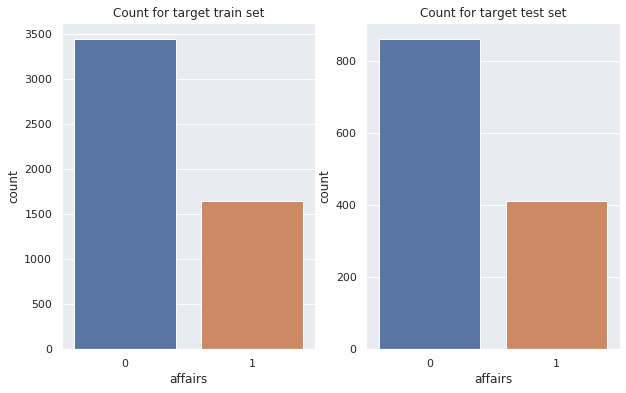

In [39]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.countplot(y_train,ax=ax1)
ax1.set_title('Count for target train set')
sns.countplot(y_test,ax=ax2)
ax2.set_title('Count for target test set')
plt.show()

In [40]:
lgr.fit(x_train,y_train)
y_pred = lgr.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print(f'random state:{10} & accuracy:{round(ac,2)}')  

random state:10 & accuracy:0.74


In [41]:
conf = confusion_matrix(y_pred,y_test)
conf

array([[794, 260],
       [ 69, 151]])

In [42]:
print("Test Accuracy from model->'lgr' without CV:",round(ac*100,2),'%')

Test Accuracy from model->'lgr' without CV: 74.18 %


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
random_grid = {'tol': [0.01, 0.001,0.0001,0.00001],
               'C': [1.0, 10.0,100.0,500],
               'max_iter': [100, 1000],
               'random_state': [1,10]}

In [46]:
Sr_random = RandomizedSearchCV(estimator = lgr,param_distributions = random_grid, n_iter = 100, cv = 5,
                               verbose=0)

In [47]:
Sr_random.fit(x_train,y_train)

/home/bibekananda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=10,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'C': [1.0, 10.0, 100.0, 500],
                                        'max_iter': [100, 1000],
                                        'random_state': [1, 10],
                                        'tol': [0.01, 0.001, 0.0001, 1e-

In [48]:
Sr_random.best_params_

{'tol': 0.01, 'random_state': 1, 'max_iter': 100, 'C': 1.0}

In [49]:
lgr1=LogisticRegression(tol= 0.01, random_state= 1, max_iter= 100, C= 1,solver='lbfgs')

In [50]:
from sklearn.model_selection import KFold

In [51]:
import pickle

def CV_train(clf,X,y,n=5):
    X = pd.DataFrame(X)
    kf = KFold(n_splits=n) 
    kf.get_n_splits(X) 

    accu = []
    for train_index, test_index in kf.split(X):
        xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
        clf.fit(xtrain,ytrain)
        pred = clf.predict(xtest)
        acc = accuracy_score(pred,ytest)
        accu.append(acc)
    prediction = clf.predict(X1)
    ac = accuracy_score(prediction,y1)
    print(f"| CV: {n} | Mean Accuracy:{round(np.mean(accu)*100,2)}% | Over all Accuracy:{round(ac*100,2)}% |")

In [52]:
for i in range(4,11):
    CV_train(lgr1,x_train,y_train,n=i)

| CV: 4 | Mean Accuracy:71.9% | Over all Accuracy:72.54% |
| CV: 5 | Mean Accuracy:71.86% | Over all Accuracy:72.57% |
| CV: 6 | Mean Accuracy:71.84% | Over all Accuracy:72.62% |
| CV: 7 | Mean Accuracy:72.07% | Over all Accuracy:72.64% |
| CV: 8 | Mean Accuracy:71.88% | Over all Accuracy:72.7% |
| CV: 9 | Mean Accuracy:71.92% | Over all Accuracy:72.68% |
| CV: 10 | Mean Accuracy:72.13% | Over all Accuracy:72.67% |


In [53]:
CV_train(lgr1,x_train,y_train,n=8)

| CV: 8 | Mean Accuracy:71.88% | Over all Accuracy:72.7% |


In [54]:
X = pd.DataFrame(x_train)
kf = KFold(n_splits=8) 
kf.get_n_splits(X) 

accu = []
for train_index, test_index in kf.split(X):
    xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain,ytest = y_train.iloc[train_index],y_train.iloc[test_index]
    lgr1.fit(xtrain,ytrain)
    pred = lgr1.predict(xtest)
    acc = accuracy_score(pred,ytest)
    accu.append(acc)
    
prediction = lgr1.predict(X1)
ac = accuracy_score(prediction,y1)
print(f"| CV: {8} | Mean Accuracy:{round(np.mean(accu)*100,2)}% | Over all Accuracy:{round(ac*100,2)}% |")

| CV: 8 | Mean Accuracy:71.88% | Over all Accuracy:72.7% |


In [55]:
test_prediction = lgr1.predict(x_test)

In [56]:
acu = accuracy_score(test_prediction ,y_test)
print("Test Accuracy from model->'lgr1' with CV:",round(acu*100,2),'%')

Test Accuracy from model->'lgr1' with CV: 74.25 %


In [57]:
confus = confusion_matrix(test_prediction,y_test)
print("Confusion Matrix from 'lgr1':")
confus

Confusion Matrix from 'lgr1':


array([[793, 258],
       [ 70, 153]])

### So, Both models are giving almost same results. However, I am choosing model  "lgr1"

In [60]:
TP = confus[0][0]
TP

793

In [61]:
TN = confus[1][1]
TN

153

In [62]:
FP = confus[0][1]
FP

258

In [63]:
FN = confus[1][0]
FN

70

In [64]:
accuracy = (TP+TN)/(TP+TN+FN+FP)
print("ACCURACY:",round(accuracy*100,2),'%')

ACCURACY: 74.25 %


In [65]:
precision = TP/(TP+FP)
print('PRECISION IS:',round(precision,2))

PRECISION IS: 0.75


In [66]:
recall = TP/(TP+FN)
print('RECALL IS:',round(recall,2))

RECALL IS: 0.92


In [67]:
F1_Score = 2*(recall * precision) / (recall + precision)
print("F1_Score is:",round(F1_Score,2))

F1_Score is: 0.83


In [68]:
auc = roc_auc_score(y_test, test_prediction)
print("Area Under Curve value will be:",round(auc,2))

Area Under Curve value will be: 0.65


In [72]:
fpr, tpr, thresholds = roc_curve(y_test, test_prediction)
print("False Positive Rate will be:",fpr[1])
print("True Positive Rate will be:",tpr[1])


False Positive Rate will be: 0.08111239860950174
True Positive Rate will be: 0.3722627737226277


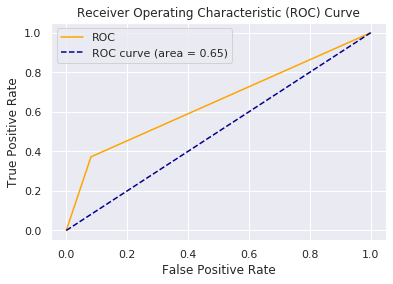

In [73]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [74]:
del X,X1,y,y1,lgr

In [75]:
del x_train,y_train,x_test,y_test

### Making few predictions

In [76]:
def preda(index=0):
    try:
        scaler = StandardScaler()
        Xdata = pd.read_csv("Xdata.csv")
        data = Xdata.apply(lambda x: np.sqrt(x))
        data = scaler.fit_transform(data)
        p = lgr1.predict([data[index]])
        if p == 0:
            print("\n No Affair")
        elif p == 1:
            print("\n Affair")
    except:
        print("Index Error..")
        print(f"Please Enter index upto:{len(Xdata)-1}")
    

In [77]:
preda(7000)

Index Error..
Please Enter index upto:6365


In [78]:
preda(5092)


 Affair


In [79]:
preda(1)


 Affair


In [80]:
preda(110)


 No Affair


In [81]:
preda(4040)


 No Affair


**----------------------------------------------------------END---------------------------------------------**